# Polynomial Evaluation and Interpolation

This handout covers the two classic problems of evaluating a polynomial (determining its value at a point or series of points) and interpolating a polynomial (given a series of points determine a polynomial that passes through those points).

## Evaluating a Polynomial

For simplicity we'll focus on integer polynomials.

**Problem:** Given a polynomial $f\in\mathbb Z[x]$, i.e., $f(x)=\sum_{i=0}^n a_i x^i$, and a value $\alpha\in\mathbb Z$ determine the value $f(\alpha)$.

**Solution:** Compute $\alpha^2,\alpha^3,\dotsc,\alpha^n$, then for each $i=0,\dotsc,n$ multiply $\alpha^i$ by $a_i$, and then add all these values together.

### Cost analysis

* Computing $\alpha^i$ from $\alpha^{i-1}$ requires one multiplication, so computing $\alpha^2,\alpha^3,\dotsc,\alpha^n$ uses $n-1$ multiplications.
* Computing $a_i\alpha^i$ for $i=0,\dotsc,n$ uses another $n$ multiplications (for $i=0$ there is no multiplication).
* Adding together the values $a_ix^i$ for $i=0,\dotsc,n$ uses $n$ additions.

In total: $2n-1$ multiplications and $n$ additions.

### Horner's method

Horner's method allows us to do a bit better.  It is based on the observation that you can factor $x$ out of every term of a polynomial except the first:

$$ f(x) = a_0 + x(a_1 + a_2x + \dotsb a_n x^{n-1}) . $$

Computing $f(\alpha)$ using this expression would save a multiplication, since the expression in parentheses is itself a polynomial of degree $n-1$ which can be evaluated using $2(n-1)-1=2n-3$ multiplications.  Then this expression can be multiplied by $\alpha$ and added to $a_0$ to get the final answer.

However, the same trick applies to the expression in parentheses so it can be applied recursively.  This leads to the expression

$$ f(x) = a_0 + x\bigr(a_1 + x\bigl(a_2 + \dotsb + x(a_{n-1} + xa_n) \cdots\, )\bigr)\bigr) . $$

Now computing $f(\alpha)$ can be done by evaluating each parenthesized expression in turn.

### Cost analysis

The first parenthetized expression $p_1:= a_{n-1}+\alpha a_n$ requires a single multiplication and addition.

The second parenthetized expression $p_2:= a_{n-2}+\alpha p_1$ also requires a single multiplication and addition.

Continuing in this way, we eventually compute $f(\alpha)=p_n=a_0+\alpha p_{n-1}$.

In total, we compute $p_1,\dotsc,p_n$ using $n$ multiplications and additions.

### Can we do better?

In fact, in general it can be shown that Horner's method is optimal, at least if the polynomial $f$ is arbitrary.

* In 1954, [A. Ostrowski](https://doi.org/10.1016/B978-1-4832-3272-0.50010-7) showed that the number of additions could not be improved
* In 1966, [V. Pan](https://doi.org/10.1070/RM1966v021n01ABEH004147) showed that the number of multiplications could not be improved.

## Baby Steps, Giant Steps

We saw that Horner's method is optimal, but sometimes we can do better!  The optimality results only apply to _general_ polynomials and we will see how we can do better if $f$ is not arbitrary but fixed.

Suppose $f$ is fixed and known in advance, so that its coeficients $a_0,\dotsc,a_n$ are considered constants, not indeterminants that might change.

We call multiplication by a constant (like $a_i$) a "scalar" multiplication.  Often it is the case that scalar multiplications can be performed much quicker than general multiplications.  In such a case it makes sense to treat them separately.

### Paterson and Stockmeyer

In 1973, [Paterson and Stockmeyer](https://doi.org/10.1137/0202007) developed the following method for polynomial evaluation known as "Baby Steps, Giant Steps".

The idea is that we can split $f$ up to approximately $\sqrt{n}$ chunks of length $\sqrt{n}$.  Of course $\sqrt{n}$ is often not an integer but we can round it to one if necessary.  Let $k=\bigl\lceil\sqrt{n+1}\,\bigr\rceil$.  Then we can write $f(x)$ as

\begin{gather*}
(a_0 + a_1x + \dotsb + a_{k-1}x^{k-1}) + {} \\
(a_k + a_{k+1}x + \dotsb + a_{2k-1}x^{k-1})x^k + {} \\
(a_{2k} + a_{2k+1}x + \dotsb + a_{3k-1}x^{k-1})x^{2k} + {} \\
\vdots \\
(a_{k^2-k} + a_{k^2-k+1}x + \dotsb + a_{k^2-1}x^{k-1})x^{k^2-k} .
\end{gather*}

Since $k^2-1\geq n$ all terms $a_ix^i$ of $f$ will appear in this decomposition of $f$.  (In the case that $k^2 > n+1$ there will also be some additional zeros at the end, but we simply take $a_i=0$ when $i$ is larger than the degree of $f$.)

### Evaluation method

Now, to evaluate $f(\alpha)$ we start by computing $\alpha^2,\alpha^3,\dotsc,\alpha^{k}$ which requires $k-1$ multiplications.  These quantities will appear in the parenthesized expressions in the above decomposition for $f(x)$.

However, the quantities $\alpha^{k},\alpha^{2k},\alpha^{3k},\dotsc,\alpha^{k^2-k}$ also appear in the decomposition.  Normally, it would take $O(n)$ multiplications to evaluate these because $k^2-k$ is approximately $n$.

Can you see a trick to evaluate $\alpha^{k},\alpha^{2k},\dotsc,\alpha^{k^2-k}$ quicker than by evaluating $\alpha^i$ for every possible $i=1,\dotsc,n$?

#### The "Giant Steps" trick

The trick is that each quantity in the sequence $\alpha^{k},\alpha^{2k},\alpha^{3k},\dotsc,\alpha^{k^2-k}$ is equal to the previous quantity multiplied by $\alpha^k$.

We already computed $\alpha^k$ in the previous step (the last of the "baby steps").  Now let $\beta:=\alpha^k$ and we perform the "giant steps" by computing

\begin{align*}
\alpha^{2k} &= \beta^2 \\
\alpha^{3k} &= \beta^3 \\
&\,\,\vdots \\
\alpha^{k^2-k} &= \beta^{k-1} .
\end{align*}

This requires $k-2$ multiplications.

Now we have everything we need to evaluate $f(\alpha)$, since we have the decomposition

$$ f(\alpha) = \sum_{i=0}^{k-1} \beta_i \, \beta^{i} \qquad\text{where}\qquad \beta_i := \sum_{j=0}^{k-1}a_{ki+j} \, \alpha^j . $$

Computing $\beta_0,\dotsc,\beta_{k-1}$ requires only additions and scalar multiplications because the $\alpha^j$ are already known and the $a_{ki+j}$ are constants.

Computing $\beta_1\cdot\beta,\beta_2\cdot\beta^2,\dotsc,\beta_{k-1}\cdot\beta^{k-1}$ requires $k-1$ another non-scalar multiplications.

Finally, adding together $\beta_i\cdot\beta^i$ for $i=0,\dotsc,k-1$ only requires additions.

#### Cost analysis summary

* Computing $\alpha^2,\dotsc,\alpha^k$ uses $k-1$ multiplications.
* Computing $\alpha^{k},\alpha^{2k},\dotsc,\alpha^{k^2-k}$ uses $k-2$ multiplications.
* Computing $\beta_0,\dotsc,\beta_{k-1}$ requires only additions and scalar multiplications.
* Computing $f(\alpha)=\sum_{i=0}^{k-1}\beta_i\beta^i$ requires additions and $k-1$ multiplications.

We will avoid counting additions and scalar multiplications (as mentioned, these can often be done quickly).

In total, this algorithm uses $3k-4$ non-scalar multiplications, which is $O(\sqrt{n})$.

### Application

Say you want to evaluate the "matrix polynomial"
$f(M) := a_0 + a_1 M + \dotsb a_n M^n$
where $M$ is an $m\times m$ matrix.

A matrix multiplication is expensive: naively it requires $O(m^3)$ ring operations.

Conversely, matrix multiplication by a constant is relatively cheap: it requires only $O(m^2)$ ring operations.

This is a perfect application for the baby steps, giant steps algorithm which allows computing $f(M)$ using $O(\sqrt{n})$ matrix multiplications instead of $O(n)$ matrix multiplications.

### Horner + baby steps, giant steps

One last thing: Horner's method can also be used to speed up the baby steps, giant steps algorithm.  Instead of evaluating

$$ f(\alpha) = \sum_{i=0}^{k-1} \beta_i \, \beta^{i} $$

directly, use Horner's method to evaluate $f(\alpha)$ via

$$ f(\alpha) = \beta_0 + \beta(\beta_1 + \dotsb + \beta(\beta_{k-2}+\beta\beta_{k-1}) \cdots\,) . $$

Now $f(\alpha)$ can be computed using $k-1$ multiplications.  This is the same as before, except that each multiplication is always by $\beta$ exactly.

Now $\beta^2,\dotsc,\beta^{k-1}$ do not have to be explicitly computed so $k-2$ non-scalar multiplications are saved.  The total number of non-scalar multiplications is still $O(k)$, however.

## Polynomial Interpolation

Next we consider the "inverse" problem: Given a sequence of points $\alpha_0,\dotsc,\alpha_{n-1}$ and the values of a polynomial $f$ at those points (i.e., $f(\alpha_0),\dotsc,f(\alpha_{n-1})$) determine the value of $f$.

### Uniqueness

The first thing to note is that $f$ cannot be unique unless you place a restriction on its degree.
However, in the same way that two points define a line (a polynomial of degree 1), in general $n$ points will define a polynomial of degree $n-1$.

Suppose there were two polynomials $f_1$ and $f_2$ of degree $n-1$ that agree on the points $\alpha_0,\dotsc,\alpha_{n-1}$.  Then $f_1-f_2$ is a polynomial of degree at most $n-1$ with $n$ roots $\alpha_0,\dotsc,\alpha_{n-1}$.

Assuming the coefficients are from a field $F$, any nonzero polynomial of degree $n$ has at most $n$ roots in $F$.  Since $f_1-f_2$ has more roots than its degree it must be the zero polynomial; thus $f_1=f_2$.

Thus, the precise problem is as follows: Given $n$ distinct points $\alpha_0,\dotsc,\alpha_{n-1}$ and the $n$ evaluations $\beta_0,\dotsc,\beta_{n-1}$, determine the unique polynomial $f$ of degree at most $n-1$ with $f(\alpha_i)=\beta_i$.

### Lagrange's formula

We will solve the interpolation problem by "building" up an $f$ out of components in such a way that $f(\alpha_i)=\beta_i$ will hold by construction.

First, we make the following observation: the polynomial $(x-\alpha_0)\dotsm(x-\alpha_{n-1})$ is zero at the points $\alpha_0,\dotsc,\alpha_{n-1}$.  This isn't directly useful but what is more useful is that if one factor (say $x-\alpha_j$) is left off then our polynomial will still be zero at all points $\alpha_i$ except for $i=j$.
<!--at all points except the $j$th point (i.e., the points $\{\,\alpha_i:i\neq j\,\}$).-->
<!--(i.e., at the points $\alpha_0,\dotsc,\alpha_{j-1},\alpha_{j+1},\dotsc,\alpha_{n-1}$).-->
In other words,

$$ \prod_{\substack{i=0\\i\neq j}}^{n-1}(x-\alpha_i) = \begin{cases}
0 & \text{if $x\in\{\,\alpha_i:i\neq j\,\}$} \\
\prod_{i\neq j}(\alpha_j-\alpha_i) & \text{if $x=\alpha_j$}.
\end{cases} $$

Dividing both sides by $\prod_{i\neq j}(\alpha_j-\alpha_i)$ gives

$$ \prod_{\substack{i=0\\i\neq j}}^{n-1}\frac{x-\alpha_i}{\alpha_j-\alpha_i} = \begin{cases}
0 & \text{if $x\in\{\,\alpha_i:i\neq j\,\}$} \\
1 & \text{if $x=\alpha_j$}.
\end{cases} $$

This quantity is known as the _Lagrange interpolant_ and we'll call it $L_j$.

Using the quantities $L_j$ it is straightforward to construct a polynomial $f$ that evaluates to anything that we want on the points $\alpha_i$.
In fact, a simple consequence of the Lagrange interpolant formula is that

$$ f(x) := \sum_{j=0}^{n-1}\beta_j L_j(x) $$

satisfies $f(\alpha_i)=\beta_i$.

Each $L_j$ has degree $n-1$, so $f$ has degree at most $n-1$.  In general $f$ will have degree $n-1$ exactly, but it is possible for some terms to cancel giving it a smaller degree.  For example, if $\beta_i=0$ for all $i$ then $f$ will be the zero polynomial.

### Example

Find the polynomial of degree at most 3 through the points $(-1,1),(0,0),(1,1)$.

Then

\begin{align*}
L_0 &:= \frac{x-0}{-1-0}\cdot\frac{x-1}{-1-1} = \frac{x(x-1)}{2}, \\
L_1 &:= \frac{x-(-1)}{0-(-1)}\cdot\frac{x-1}{0-1} = -(x+1)(x-1), \\
L_2 &:= \frac{x-(-1)}{1-(-1)}\cdot\frac{x-0}{1-0} = \frac{x(x+1)}{2},
\end{align*}

and

$$ f(x) = 1\cdot L_0 +0\cdot L_1 + 1\cdot L_2 = \frac{x(x-1)}{2} + \frac{x(x+1)}{2} = x^2 . $$

Amazingly, appropriate sums of $L_0$, $L_1$, and $L_2$ can be used to find a polynomial of degree at most 2 through **any** arbitrary points at $x=-1,0,1$.

Plotting $L_0,L_1,L_2$ might help you see this visually; note that each of these polynomials evaluate to exactly $\{0,0,1\}$ (in some order) at $x=-1,0,1$.

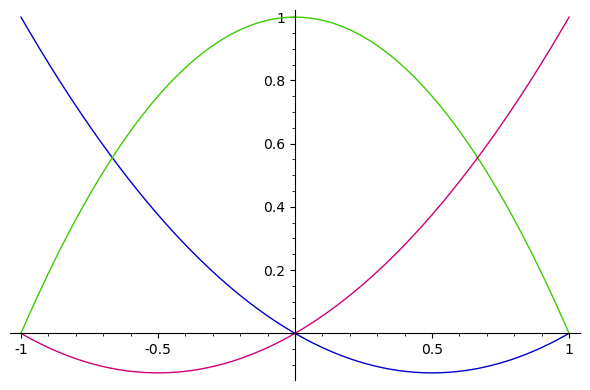

In [1]:
plot([x*(x-1)/2, -(x+1)*(x-1), x*(x+1)/2])

### Cost analysis

Evaluating the denominator of $L_j$, i.e., $\prod_{i\neq j}(\alpha_j-\alpha_i)$, requires $n-1$ subtractions and $n-2$ multiplications in the coefficient field; doing this for $j=0,\dotsc,n-1$ then requires $O(n^2)$ coefficient operations.

Evaluating the numerator of $L_j$, i.e., $\prod_{i\neq j}(x-\alpha_i)$, requires multiplying $n-1$ linear polynomials together.  Doing this iteratively requires multiplying a polynomial of degree $i$ with a polynomial of degree $1$ for $i=1,\dotsc,n-2$.  In total, this is $\sum_{i=1}^{n-2}O(i)=O(n^2)$ coefficient operations to evaluate one $L_j$.  Over all $0\leq j<n$ this uses $O(n^3)$ coefficient operations.

**Improvement:** The computation of $L_j$ for all $j$ can be improved.  Instead, compute $L:=\prod_{i=0}^{n-1}(x-\alpha_i)$ iteratively (like above) which uses $\sum_{i=1}^{n-1}O(i)=O(n^2)$ coefficient operations.  Then compute

$$ L_j := \frac{L}{x-\alpha_j} \qquad \text{for $j=0,\dotsc,n-1$}. $$

Each division is performed between a polynomial of degree $n$ and a polynomial of degree $1$, so each division uses $O(n)$ coefficient operations.  Thus all $L_j$ can be computed in $O(n^2)$ coefficient operations using this improved approach.

Lastly, we want to evaluate the sum $\sum_j \beta_j L_j$.  Multiplying $\beta_j$ by $L_j$ uses $O(n)$ multiplications; in total this uses $\sum_{j=0}^{n-1}O(n)=O(n^2)$ multiplications.  Adding $\beta_iL_i$ to $\sum_{j=0}^{i-1}\beta_jL_j$ uses $O(n)$ additions so doing this for $i=1,\dotsc,n-1$ uses $O(n^2)$ total additions.

**In summary:** Using Lagrange's interpolation formula on $n$ points requires $O(n^2)$ coefficient operations to reconstruct the polynomial $f$ assuming we use the improved approach to compute the Lagrange interpolants $L_j$.

## Secret Sharing

A nice application of interpolation is _secret sharing_: You want to share a secret among $n$ parties so that they can only determine the secret if everyone works together; any subset of $n-1$ people cannot determine the secret.

The scheme relies on the fact that a polynomial of degree $n-1$ can be efficiently determined from $n$ points by using Lagrange interpolants.

### Description

Suppose you want to distribute a secret with $k$ bits among $n$ people.  Let $p$ be a prime larger than $2^k$ and let $F:=\mathbb{F}_p=\{0,\dotsc,p-1\}$ be the field of integers modulo $p$.

Let $a_0\in F$ be the secret that you want to share.  Randomly and uniformly select $a_1,\dotsc,a_{n-1},\alpha_0,\dotsc,\alpha_{n-1}\in F$ subject to the constraint that the $\alpha_i$ are nonzero and mutually distinct.

Now construct $f(x):=\sum_{i=0}^{n-1}a_i x^i \in F[x]$ and evaluate $f$ at the points $\alpha_0,\dotsc,\alpha_{n-1}$.  Let $\beta_i:=f(\alpha_i)$ for $0\leq i<n$.

Now give party $i$ the quantity $(\alpha_i,\beta_i)$.

Now all $n$ parties can come together and perform interpolation on the points $(\alpha_0,\beta_0),\dotsc,(\alpha_{n-1},\beta_{n-1})$ to reconstruct the unique polynomial of degree $n-1$ through these points.  Since the polynomial is unique it must match $f$ exactly and therefore its constant term $a_0$ reveals the secret.

#### Why does this work?

If any $n-1$ parties (say for $0\leq i<n-1$) come together they can find a polynomial $g$ with $g(\alpha_i)=\beta_i$ for $0\leq i<n-1$.

However, they don't know $\beta_{n-1}$ so they cannot enforce $g(\alpha_{n-1})=\beta_{n-1}$.  It is unlikely that the polynomial $g$ satisfies this; essentially, any value of $F$ is equally likely for the value of $g(\alpha_{n-1})$.

Similarly, it is unlikely that $g(0)=a_0$ and the constant term of $g$ provides no information about the constant term of $f$.

## Application to Polynomial Multiplication

We will now use polynomial interpolation to give an algorithm for multiplying polynomials that uses a linear number of _non-scalar multiplications_ (where the non-scalars are taken to be the coefficients of the polynomials being multiplied).

**Warning:** The algorithm is **not** linear when analyzed in terms of the usual cost of coefficient operations.
It may even be slower than the "schoolbook" method in terms of coefficient operations.
However, we'll see how the idea behind this algorithm can be used to design a faster algorithm for polynomial multiplication in terms of coefficient operations.

### Multiplication via interpolation

Suppose that we want to multiply two polynomials $f,g\in F[x]$ of degree $n$.
Say $h(x):=f(x)\cdot g(x)$ is the product of $f$ and $g$ that we want to find.

Choose distinct scalars $\alpha_0,\dotsc,\alpha_{2n}\in F$.  Evaluate $f$ and $g$ at these scalars; say

$$\beta_i := f(\alpha_i) \qquad\text{and}\qquad \gamma_i := g(\alpha_i) \qquad \text{for $0\leq i\leq 2n$.} $$

Now compute $\delta_i:=\beta_i\cdot\gamma_i$ for $0\leq i\leq 2n$.

Then $h(\alpha_i)=f(\alpha_i)\cdot g(\alpha_i)=\beta_i\cdot\gamma_i=\delta_i$, so the points $(\alpha_0,\delta_0),\dotsc,(\alpha_{2n},\delta_{2n})$ are $2n+1$ points that lie on the graph of $h$.
Since $h$ has degree $2n$ it is uniquely defined by $2n+1$ distinct points.

Thus applying interpolation to the points $(\alpha_i,\delta_i)$ for $0\leq i\leq 2n$ recovers the polynomial $h$ which is the product of $f$ and $g$.

### Non-scalar cost analysis

First, let's analyze the cost of this multiplication algorithm in terms of the number of non-scalar multiplications.  The non-scalars are the coefficients of the polynomials $f$ and $g$.  The points $\alpha_i$ are considered to be scalars since they can be fixed in advance and do not depend on the input.

Computing $f(\alpha_i)$ and $g(\alpha_i)$ do not require any non-scalar multiplications because $\alpha_i,\alpha_i^2,\dotsc,\alpha_i^n$ are also all scalars.  Thus the only multiplications necessary for computing $f(\alpha_i)$ are scalar-times-non-scalar multiplications.

However, the results $\beta_i=f(\alpha_i)$ and $\gamma_i=g(\alpha_i)$ are non-scalar quantities, so computing the $\delta_i=\beta_i\cdot\gamma_i$ uses $2n+1$ non-scalar multiplications.

Performing interpolation requires **no** non-scalar multiplications: The Lagrange interpolants $L_j$ purely involve scalars, while computing the sum $h(x):=\sum_{j=0}^{2n}\delta_j\cdot L_j(x)$ only involves additions and scalar-times-non-scalar multiplications.

Thus, this algorithm for multiplying polynomials uses $O(n)$ non-scalar multiplications.

### Cost analysis in terms of coefficient operations

Unfortunately, the algorithm is not optimal in terms of coefficient operations.  Computing $f(\alpha_i)$ for a single $i$ uses $O(n)$ coefficient operations, so it costs $O(n^2)$ when done for all $0\leq i\leq 2n$.  Similarly, computing $g(\alpha_i)$ for all $i$ costs $O(n^2)$.

Computing $\delta_i=\beta_i\cdot\gamma_i$ is a single multiplication so this costs $O(n)$ when done for all $0\leq i\leq 2n$.

Finally, we saw that interpolating a polynomial of degree $n$ costs $O(n^2)$, so interpolating a polynomial of $2n$ also costs $O(n^2)$.

### Takeaway

The cost of an algorithm in terms of non-scalar multiplications may be much better than the cost in terms of general operations.  Whether or not the non-scalar cost is useful in practice depends on the context.

In some contexts (e.g., when the $\alpha_i\in F$ are much easier to compute with than the general coefficients of $f$ and $g$) the non-scalar multiplication cost might be more relevant.  In other contexts, the total number of operations used might be more relevant.  Whenever you are analyzing an algorithm you need to make sure the cost model is explicit.

### Foreshadowing

Finally, note that this multiplication algorithm only requires the $\alpha_i$ to be distinct and there are no other restrictions&mdash;you can choose the $\alpha_i$ however you like.

This foreshadows a potential way of improving this algorithm: choose the $\alpha_i$ in a way that somehow makes the evaluation and interpolation easier to perform.

In fact, in the next section we will see that it is possible to choose the $\alpha_i$ in a way that allows the computations to be performed **much** faster.